In [1]:
from IPython.core.display import HTML
css = open('table.css').read() + open('notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
%matplotlib inline
import pandas
import numpy
import matplotlib
import sklearn

# <center> Data Analysis Pipeline</center>


![alt text](analysis_pipeline.png "Analysis Pipeline")

# <center>Jupyter notebook</center>

## Interactive Shell for Python.
    * Seperate each functional unit into different blocks.
    * Simultaneously organize, code, visualize, write results.
        * Mix and match notes (Markdown), code, math (LaTeX), numerical results, and graphs / other visuals (MatplotLib) all in one place


Big plus: You can share notebooks easily 
    * like passing out an interactive handout, rather than some static result. Others can modify/contribute


## Run unix commands in block using ! :

In [3]:
!ls -l

total 1316
-rw-rw-r-- 1 mike mike 149002 Jun 22 17:12 analysis_pipeline.png
-rw-rw-r-- 1 mike mike 321099 Jun 22 17:18 Data Wrangling & EDA with Python & Pandas & Matplotlib.html
-rw-rw-r-- 1 mike mike 116375 Jun 22 17:18 Data Wrangling & EDA with Python & Pandas & Matplotlib.ipynb
-rw-rw-r-- 1 mike mike    120 Jun 22 17:20 notebook.css
-rw-rw-r-- 1 mike mike    120 Jun 22 15:22 notebook.css~
-rw-rw-r-- 1 mike mike  24147 Jun 22 13:55 slides.html
-rw-r--r-- 1 mike mike 702942 Apr 20 21:59 spambase.data
-rw-r--r-- 1 mike mike   3566 Apr 20 21:59 spambase.names
-rw-rw-r-- 1 mike mike    597 Jun 11 11:27 table.css


## Insert latex code / equations using magic %%latex :

In [4]:
%%latex
\[ 
    p(A|B) = \frac {p(B|A)p(B)} {p(B)} 
\]
 

<IPython.core.display.Latex object>

## Inline functions work as well: $E=mc^2$

# <center> Pandas </center>
## Gives Python the data structures to conveniently work with, manipulate data for data analysis
### The "DataFrame" object
(Analogous to R "DataFrame" / functions, plus a bit of "dplyr" "tidyr" functionality)

Functions for:
    * Reading/writing files directly into DataFrame objects
    * Manipuate data: indexing, slicing, subsetting data, groupby, joining

Can conveniently use pandas objects in sk-learn, statsmodels


Well integrated with matplotlib to easily visualize data inside pandas data frames / series

# <center> Brief sample of Pandas functionality </center>


Simplified data, examples taken from PyCon 2015 tutorial by Brandon Rhodes:

https://github.com/brandon-rhodes/pycon-pandas-tutorial

## Sample of IMDB Data: tables for titles, release dates, cast


## Reading in from csv

In [5]:
titles = pandas.read_csv('../pycon-pandas-tutorial/data/titles.csv')
titles.head()

releasedate = pandas.read_csv('../pycon-pandas-tutorial/data/release_dates.csv',
                             parse_dates=['date'])

cast = pandas.read_csv('../pycon-pandas-tutorial/data/cast.csv')

In [6]:
cast.head()


,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [7]:
type(cast)

pandas.core.frame.DataFrame

## Indexing: by column name

In [8]:
cast['title'].head()

0           Suuri illusioni
1       Battle of the Sexes
2      Secret in Their Eyes
3                Steve Jobs
4    Straight Outta Compton
Name: title, dtype: object

In [9]:
type(cast['title'])

pandas.core.series.Series

## Indexing: by row ID

In [10]:
cast[3:6]

,title,year,name,type,character,n
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN


## Indexing: by index number

In [11]:
cast.iloc[0:10,[3,4,5]]

,type,character,n
0,actor,Guests,22.0
1,actor,Bobby Riggs Fan,10.0
2,actor,2002 Dodger Fan,NaN
3,actor,1988 Opera House Patron,NaN
4,actor,Club Patron,NaN
5,actor,Dopeman,NaN
6,actor,Thug 1,NaN
7,actor,Actor Playing Eteocles from 'Antigone',NaN
8,actor,Two Palms - Ua'i Paame,8.0
9,actor,Chico,9.0


## Indexing: by boolean Series

In [12]:
cast[ cast.n == 1 ].head()

,title,year,name,type,character,n
95,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1.0
128,All Things Fall Apart,2011,50 Cent,actor,Deon,1.0
133,Freelancers,2012,50 Cent,actor,Malo,1.0
134,Get Rich or Die Tryin',2005,50 Cent,actor,Marcus,1.0
135,Gun,2010,50 Cent,actor,Rich,1.0


## Dealing with missing data: Removing observations

In [13]:
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [14]:
cast.dropna(how='any').head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
9,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0
13,My Song for You,2010,George 'Bootsy' Thomas,actor,Cooley's Customer,16.0


## Dealing with missing data: Filling in defaults

In [15]:
cast.fillna(value=-1).head()
#cast.fillna(value=cast.n.mean())

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,-1.0
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,-1.0
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,-1.0


## Most pandas functions conveniently deal with missing info

Usually, by ignoring them in calculations

In [16]:
cast.n.describe()

count    2.160454e+06
mean     1.674510e+01
std      3.214643e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.000000e+01
75%      2.100000e+01
max      3.361300e+04
Name: n, dtype: float64

## Data Manipulation

## Subsetting data over rows / observations
Analogous to a SQL "WHERE"

### Use boolean indexing

In [17]:
cast[ (cast.year >= 2000) & (cast.year <= 2009) ].head()

,title,year,name,type,character,n
6,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
11,The Replacements,2000,Steven 'Bear'Boyd,actor,Defensive Tackle - Washington Sentinels,NaN
15,B-Girl,2009,Jesse 'Casper' Brown,actor,Battle Judge,25.0
17,Kickin' It Old Skool,2007,Jesse 'Casper' Brown,actor,Cole,10.0
21,Barrio Gangsters,2009,Marcelino 'Dibujo' Torres,actor,Dibujo,NaN


## Selecting data over attributes / columns

Analogous to a SQL "SELECT"

### Use column name indexing 

In [18]:
cast[ ['name', 'type', 'character', 'n'] ].head()
#OR cast.iloc[:,[2,3,4,5]].head()

,name,type,character,n
0,Homo $,actor,Guests,22.0
1,$hutter,actor,Bobby Riggs Fan,10.0
2,$hutter,actor,2002 Dodger Fan,NaN
3,$hutter,actor,1988 Opera House Patron,NaN
4,$hutter,actor,Club Patron,NaN


## Grouping tables by variables

Analogous to a SQL "GROUPBY"

Usually, to compute some aggregate (count, sum, etc...)


In [19]:
cast.groupby(['title','type'])

By itself, it just groups the obsevations and stores as a DataFrameGroupBy object, but you have to do something with it.

In [20]:
#Group by the values specified, and then aggregate within each group
cast.groupby(['title', 'type'])['year'].count().head()

title             type   
#1 Serial Killer  actor      18
                  actress    12
#5                actor       2
#50Fathers        actor      29
                  actress    11
Name: year, dtype: int64

# <center> Examples putting it all together, plus some visualization using Matplotlib </center>

## Find out when Christmas movies are released, in the  US, Japan, and Australia

In [21]:
r = releasedate
r = r[(r.title.str.contains("Christmas"))] #select only movies with Christmas in title

#select movies released in USA, Japan, or Australia
r = r[(r.country == "USA") | (r.country == "Japan") | (r.country == "Australia")]

#Need to compute an aggregate for each country, for each month
#groupby, then unstack
g = r.groupby( [r.date.dt.month, 'country'] ).size()
h = g.unstack('country')
h


country,Australia,Japan,USA
date,,,
1,NaN,NaN,2.0
2,NaN,NaN,1.0
3,NaN,1.0,NaN
4,NaN,NaN,1.0
5,NaN,1.0,1.0
6,NaN,NaN,2.0
7,NaN,NaN,1.0
8,NaN,NaN,2.0
9,2.0,NaN,1.0


## Plotting results

## Call plotting function on DataFrame object

### Various functions: plot.bar(), plot.hist(), plot.line(), etc...


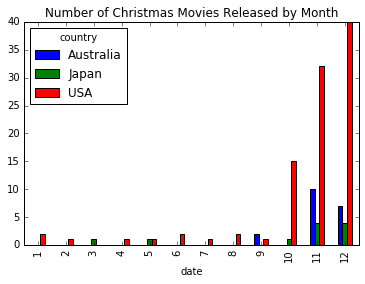

In [22]:
axis = h.plot.bar(ylim=[0,40], title="Number of Christmas Movies Released by Month")

## Another way to plot, 3 different plots

### use subplots() function, and work with the returned figure and axis objects

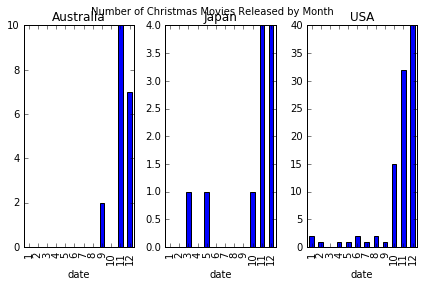

In [23]:
fig, axis = matplotlib.pyplot.subplots(nrows=1, ncols=3)

for i in range(0,3):
    h.iloc[:,i].plot.bar(ax=axis[i], title=h.columns.values[i])

fig.suptitle('Number of Christmas Movies Released by Month', fontsize=10)
fig.tight_layout()

## One more example: Determine the fraction of leading roles, main supporting roles, that are played by men

In [24]:

c = cast
c = c[(c.n >=1) & (c.n <= 3)] #subset only main leading, supporting roles

#group by the role heirarchy (n), year, and gender (type)
g = c.groupby(['n', 'year', 'type']).size()
g.head(20)

n    year  type   
1.0  1906  actor        2
           actress      1
     1907  actor        1
     1908  actor        1
     1909  actor        1
     1910  actor        1
           actress      4
     1911  actor       17
           actress      9
     1912  actor       15
           actress     12
     1913  actor       81
           actress     51
     1914  actor      223
           actress    141
     1915  actor      365
           actress    301
     1916  actor      454
           actress    504
     1917  actor      444
dtype: int64

### pivot by the type to have the totals across gender for each year

In [25]:
h = g.unstack('type')
h = h.fillna(0)
h.head(10)


type      actor  actress
n   year                
1.0 1906    2.0      1.0
    1907    1.0      0.0
    1908    1.0      0.0
    1909    1.0      0.0
    1910    1.0      4.0
    1911   17.0      9.0
    1912   15.0     12.0
    1913   81.0     51.0
    1914  223.0    141.0
    1915  365.0    301.0

### Compute fractions for each year, and plot

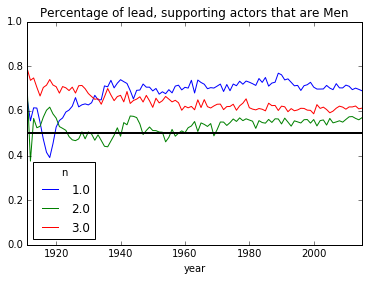

In [26]:
h = h.actor / (h.actor + h.actress)

d = h.unstack('n')
d = d[5:-5]   #Take out the edges with "weird" data

fig, axis = matplotlib.pyplot.subplots(nrows=1, ncols=1)
d.plot.line(ax=axis, title="Percentage of lead, supporting actors that are Men")
axis.set_ylim(0,1)

matplotlib.pyplot.axhline(y=.5, xmin=0, xmax=1, hold=None, linewidth=2, color='k')

# Things i'd like to learn

* ## Get better idea of relative power for (R, MATLAB, Python) for working with data
* ## Getting more well versed in matplotlib to produce publication quality visualization
* ## Generating publication quality PDFs, slide decks, using jupyter & preferably LaTeX (e.g. on the level of R / knitr / pandoc)
* ## Coding up predictive models efficiently using numpy
